In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_and_concatenate_files(folder_path):
    # Initialize an empty DataFrame to store the data
    original = pd.DataFrame()
    ekman = pd.DataFrame()
    group = pd.DataFrame()

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a CSV file
        if file_name.endswith("_clean.csv"):
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Add a column with the variation name
            variation = file_name.replace("_clean.csv", "")
            df['Variation'] = variation
            if 'original' in variation:
                # Concatenate the DataFrame to the result_df
                original = pd.concat([original, df], ignore_index=True)
            if 'ekman' in variation:
                ekman = pd.concat([ekman, df], ignore_index=True)
            elif 'group' in variation:
                group = pd.concat([group, df], ignore_index=True)

    # Pivot the DataFrame to have metric as index, variation as columns, and values as data
    original = original.pivot(index='Metric', columns='Variation', values='Value')
    ekman = ekman.pivot(index='Metric', columns='Variation', values='Value')
    group = group.pivot(index='Metric', columns='Variation', values='Value')

    return original, ekman, group

In [2]:
folder_path = 'clean_results'

# Call the function to read and concatenate files
original, ekman, group = read_and_concatenate_files(folder_path)
group = group[1:][:]

In [3]:
original

Variation,original,original_balanced,original_earlystop_dl,original_w_backtranslation
Metric,,,,
accuracy,0.456974,0.455316,0.449972,0.456606
loss,0.146479,0.144935,0.138018,0.145841
macro_f1,0.507874,0.504078,0.473917,0.501636
macro_precision,0.544075,0.511475,0.506003,0.542776
macro_recall,0.554913,0.546694,0.486656,0.542884
micro_f1,0.605434,0.604555,0.604189,0.605530
micro_precision,0.617201,0.611614,0.622522,0.616507
micro_recall,0.624901,0.626955,0.624427,0.628061
weighted_f1,0.589430,0.588650,0.587435,0.587312


In [4]:
ekman

Variation,ekman,ekman_balanced,ekman_w_backtranslation
Metric,,,
accuracy,0.573245,0.563663,0.573245
loss,0.640526,0.667116,0.640526
macro_f1,0.622933,0.619178,0.622933
macro_precision,0.612657,0.604902,0.612657
macro_recall,0.690528,0.678716,0.690528
micro_f1,0.696518,0.686104,0.696518
micro_precision,0.659091,0.652618,0.659091
micro_recall,0.765355,0.768578,0.765355
weighted_f1,0.696437,0.687235,0.696437


In [5]:
group

Variation,group,group_balanced,group_w_backtranslation
Metric,,,
accuracy,0.610098,0.599410,0.610098
loss,1.130117,1.130925,1.130117
macro_f1,0.693717,0.696521,0.693717
macro_precision,0.657374,0.646438,0.657374
macro_recall,0.799253,0.796281,0.799253
micro_f1,0.716217,0.717500,0.716217
micro_precision,0.687009,0.678094,0.687009
micro_recall,0.810978,0.815094,0.810978
weighted_f1,0.717811,0.721258,0.717811


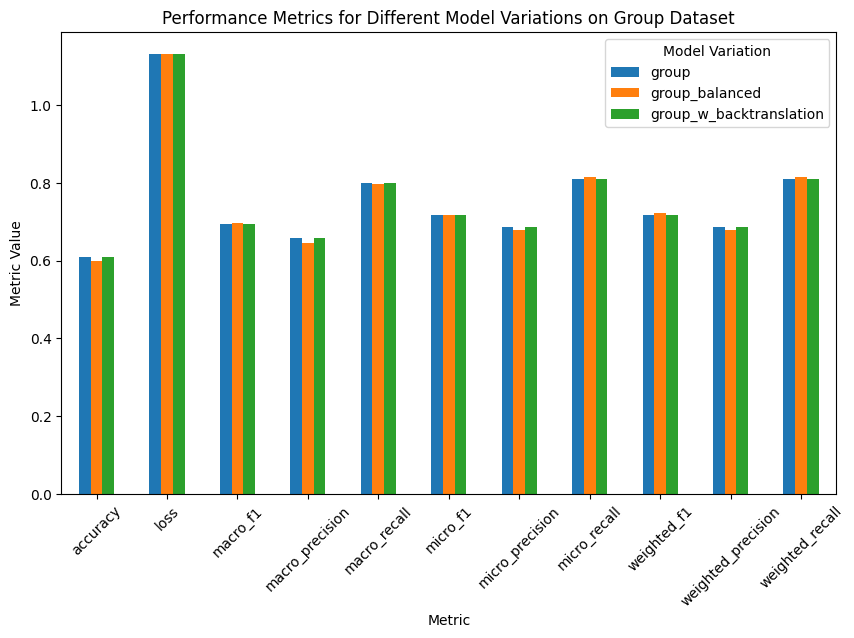

In [6]:
#group.set_index('Metric', inplace=True)
# Plotting
ax = group.plot(kind='bar', figsize=(10, 6), rot=45)
ax.set_ylabel('Metric Value')
ax.set_xlabel('Metric')
ax.set_title('Performance Metrics for Different Model Variations on Group Dataset')
plt.legend(title='Model Variation', bbox_to_anchor=(1, 1))

plt.savefig('group.png', bbox_inches='tight')
plt.show()

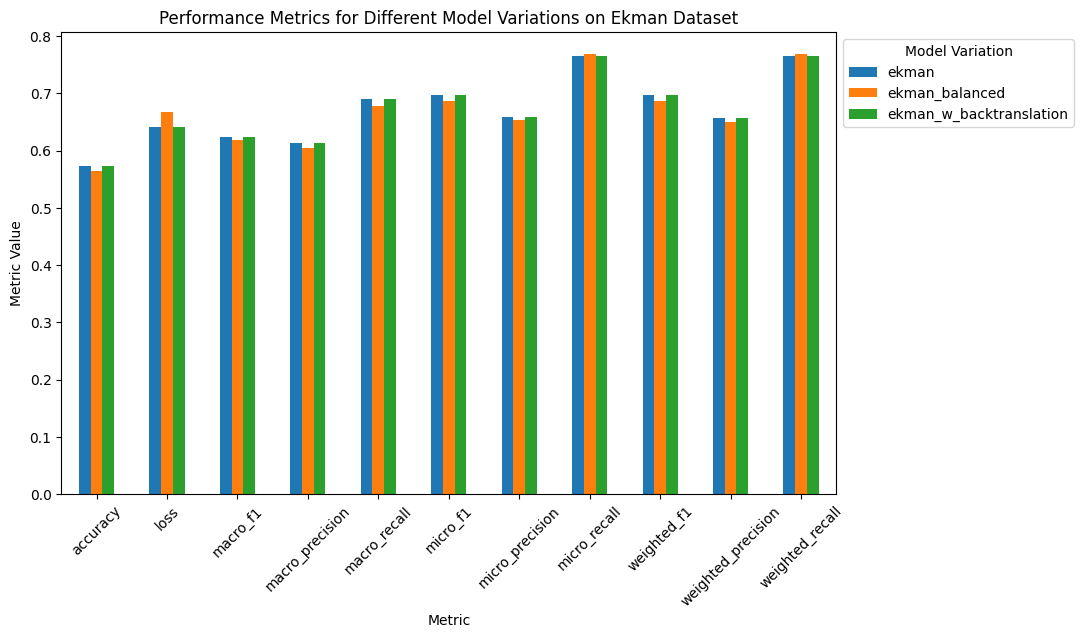

In [7]:
ax = ekman.plot(kind='bar', figsize=(10, 6), rot=45)
ax.set_ylabel('Metric Value')
ax.set_xlabel('Metric')
ax.set_title('Performance Metrics for Different Model Variations on Ekman Dataset')
plt.legend(title='Model Variation', bbox_to_anchor=(1, 1))

plt.savefig('ekman.png', bbox_inches='tight')
plt.show()

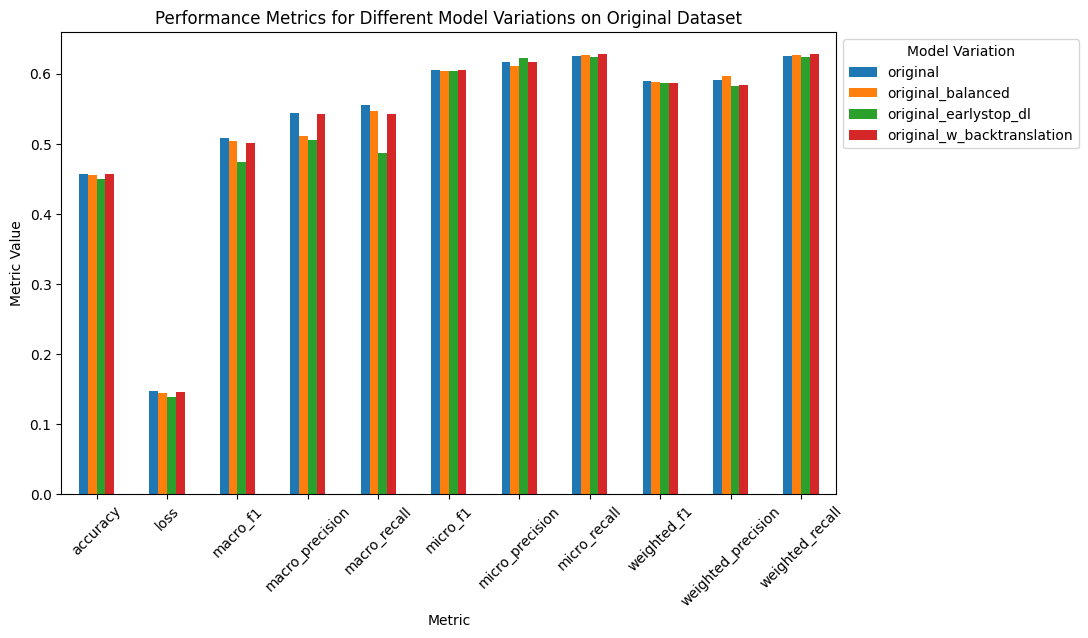

In [8]:
ax = original.plot(kind='bar', figsize=(10, 6), rot=45)
ax.set_ylabel('Metric Value')
ax.set_xlabel('Metric')
ax.set_title('Performance Metrics for Different Model Variations on Original Dataset')
plt.legend(title='Model Variation', bbox_to_anchor=(1, 1))

plt.savefig('original.png', bbox_inches='tight')
plt.show()